In [378]:
from os.path import dirname, abspath, join
import pickle
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import make_axes_locatable
import cmocean

file = '2020-02-23-21-36-17.bag'

dirPath = abspath(dirname(''))
image_file = join(join(join(dirname(dirPath), 'data'),'images'), file+'.png')
data_file = file+'.csv'

data_path = join(join(dirname(dirPath),'data'), data_file)

with open(data_path, 'r') as f:
    data_raw = pd.read_csv(f)

with open(join(join(dirname(dirPath),'data'), 'path.pkl'), 'rb') as f:
    path = pickle.load(f)

def moving_avg(poses, n):
    N = int(len(poses)/n)
    n = N
    moving_avg = []
    tmp = []
    for i in range(len(poses)):
        tmp.append(poses[i])
        if(i >= N):
            moving_avg.append(np.mean(tmp))
            tmp = []
            N = n+N
    return moving_avg

data_raw_200 = data_raw
path_200 = path
data_raw.head(40)

,t,speed,x_pos,y_pos,deviation,x_lin_acc,y_lin_acc,z_lin_acc
0,0.000026,0.0,-2.535677,-3.461602,0.239126,0.110132,0.610515,9.719163
1,0.000065,0.0,-2.535677,-3.461602,0.239126,0.110132,0.610515,9.719163
2,0.000094,0.0,-2.535677,-3.461602,0.239126,0.110132,0.610515,9.719163
3,0.000121,0.0,-2.535677,-3.461602,0.239126,0.110132,0.610515,9.719163
4,0.000150,0.0,-2.535677,-3.461602,0.239126,0.110132,0.610515,9.719163
5,0.000178,0.0,-2.535677,-3.461602,0.239126,0.110132,0.610515,9.719163
6,0.000204,0.0,-2.535677,-3.461602,0.239126,0.110132,0.610515,9.719163
7,0.000231,0.0,-2.535677,-3.461602,0.239126,0.110132,0.610515,9.719163
8,0.000257,0.0,-2.535677,-3.461602,0.239126,0.110132,0.610515,9.719163
9,0.000286,0.0,-2.535677,-3.461602,0.239126,0.110132,0.610515,9.719163


Text(0.5, 1.0, 'speed')

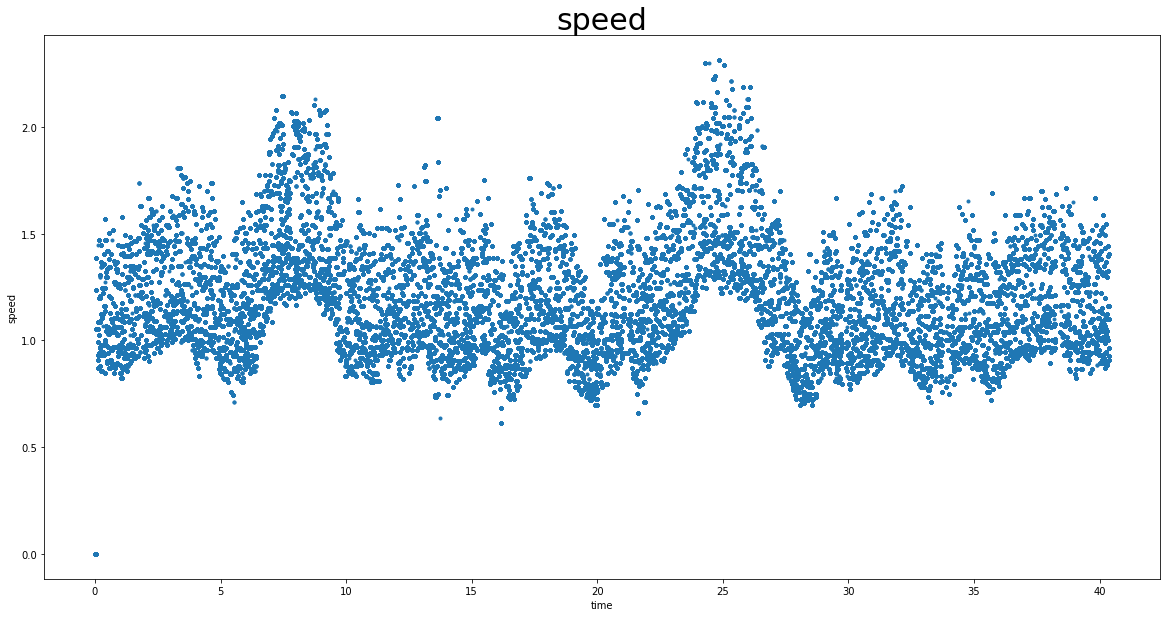

In [353]:
t = data_raw['t']
speed = data_raw['speed']
x_pos = data_raw['x_pos']
y_pos = data_raw['y_pos']
deviation = data_raw['deviation']

grad = 1
start = 0
end = 1200000

fig = plt.figure(figsize=(20,10))
plt.plot(t[start:end][::grad], speed[start:end][::grad], '.')
plt.xlabel('time')
plt.ylabel('speed')
plt.title('speed', fontsize=30)

# safety = 80

-3.25336534041982

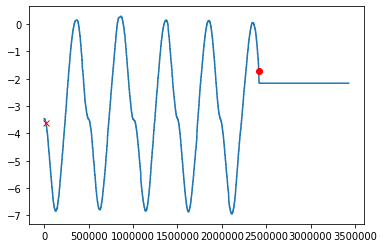

In [392]:
#data_raw = data_raw_80
#path = path_80
#ride_end_ind = ride_end_ind_100

t = data_raw['t']
speed = data_raw['speed']
x_pos = data_raw['x_pos']
y_pos = data_raw['y_pos']

x_acc_ = data_raw['x_lin_acc']
y_acc_ = data_raw['y_lin_acc']
z_acc_ = data_raw['z_lin_acc']


# choose appropriate begining index and end index
plt.plot(y_pos)
ride_end_ind = 2415000
ride_start_ind = 20000
plt.plot(ride_end_ind, y_pos[ride_end_ind], 'or')
plt.plot(ride_start_ind, y_pos[ride_start_ind], 'xr')


speed = [s for s in speed[ride_start_ind:ride_end_ind]]
x_pos = [x for x in x_pos[ride_start_ind:ride_end_ind]]
y_pos = [y for y in y_pos[ride_start_ind:ride_end_ind]]

x_acc_ = [a for a in x_acc_[ride_start_ind:ride_end_ind]]
y_acc_ = [a for a in y_acc_[ride_start_ind:ride_end_ind]]
z_acc_ = [a for a in z_acc_[ride_start_ind:ride_end_ind]]

path_x = [point['x'] for point in path]
path_y = [point['y'] for point in path]

x_pos[0]

In [393]:
# make an avarage
x_avg = moving_avg(x_pos, 1000)
y_avg = moving_avg(y_pos, 1000)

avg_x_acc = moving_avg(x_acc_, 1000)
avg_y_acc = moving_avg(y_acc_, 1000)
avg_z_acc = moving_avg(z_acc_, 1000)

speed_avg = moving_avg(speed, 1000)

# wyrównaj obraz 
off_x = 4
off_y = 7

x_avg = [x+off_x for x in x_avg]
y_avg = [y+off_y for y in y_avg]
path_x = [x+off_x for x in path_x]
path_y=[y+off_y for y in path_y]

## speed on the track

(0, 6.903695311646828)

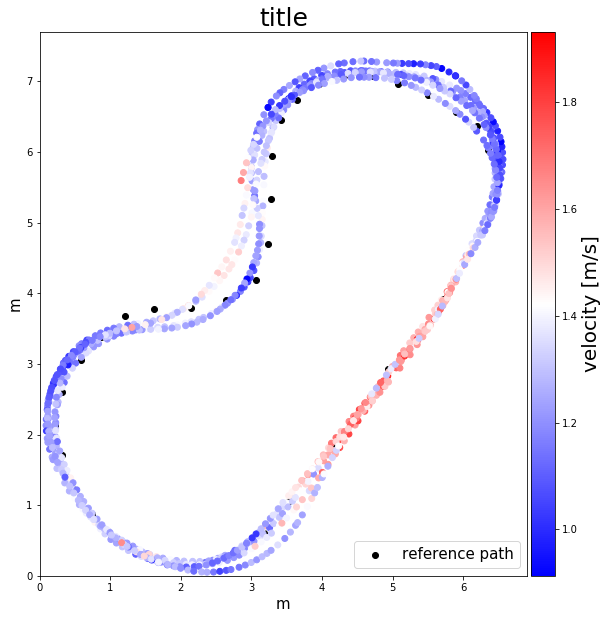

In [394]:
fig = plt.figure(figsize=(20,10))
ax = plt.gca()
plt.title('title', fontsize=25)
plt.xlabel('m', fontsize=15)
plt.ylabel('m', fontsize=15)
plt.scatter(path_x, path_y, color='black')
plt.legend(['reference path'], loc='lower right', fontsize=15)
im = plt.scatter(x_avg, y_avg, c=speed_avg, cmap='bwr')
divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="5%", pad=0.05)

cb = plt.colorbar(im, cax=cax)
cb.set_label('velocity [m/s]', fontsize=20)

ax.set_aspect('equal')
ax.set_ylim(ymin=0)
ax.set_xlim(xmin=0)
#plt.savefig(image_file)

## resultant acceleration on the track

(0, 6.903695311646828)

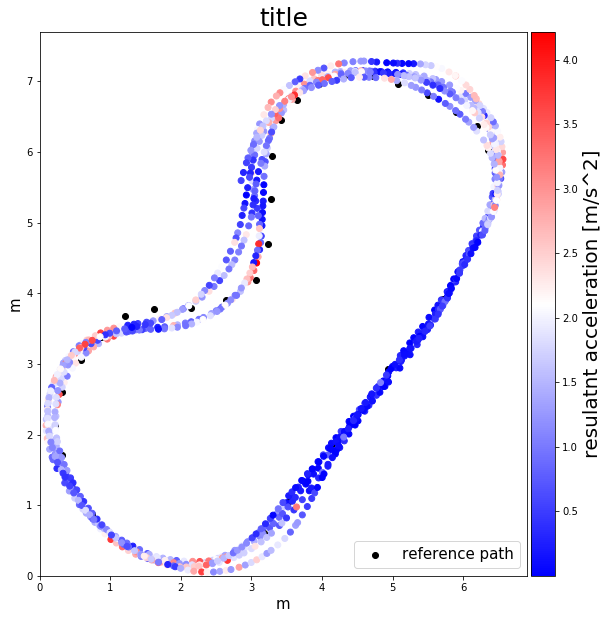

In [395]:
res_acc = [(x**2+y**2) for x,y in zip(avg_x_acc, avg_y_acc)]

fig = plt.figure(figsize=(20,10))
ax = plt.gca()
plt.title('title', fontsize=25)
plt.xlabel('m', fontsize=15)
plt.ylabel('m', fontsize=15)
plt.scatter(path_x, path_y, color='black')
plt.legend(['reference path'], loc='lower right', fontsize=15)
im = plt.scatter(x_avg, y_avg, c=res_acc, cmap='bwr')
divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="5%", pad=0.05)

cb = plt.colorbar(im, cax=cax)
cb.set_label('resulatnt acceleration [m/s^2]', fontsize=20)

ax.set_aspect('equal')
ax.set_ylim(ymin=0)
ax.set_xlim(xmin=0)



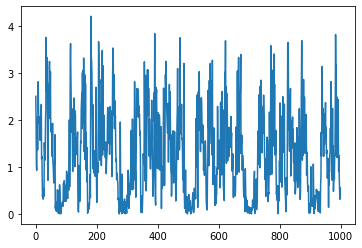

In [396]:
plt.plot(res_acc)

## extract turn after long straight

In [412]:
x_cut = 3.6
y_cut = 3

x_turn = []
y_turn = []
x_acc = []
y_acc = []
z_acc = []
global_idx = []

for i, x,y, xa, ya, za in zip(range(len(x_pos)),x_pos, y_pos, x_acc_, y_acc_, z_acc_):
    if(y>y_cut-off_y and x>x_cut-off_x):
        x_turn.append(x+off_x)
        y_turn.append(y+off_y)
        x_acc.append(xa)
        y_acc.append(ya)
        z_acc.append(za)
        global_idx.append(i)
print(len(x_turn))
print(len(x_acc))
        
n_pathpoints_in_turn = 0
for x,y in zip(path_x, path_y):
    if(y>y_cut and x>x_cut):
          n_pathpoints_in_turn=n_pathpoints_in_turn+1
print('n_pathpoints_in_turn : '+repr(n_pathpoints_in_turn))


841702
841702
n_pathpoints_in_turn : 12


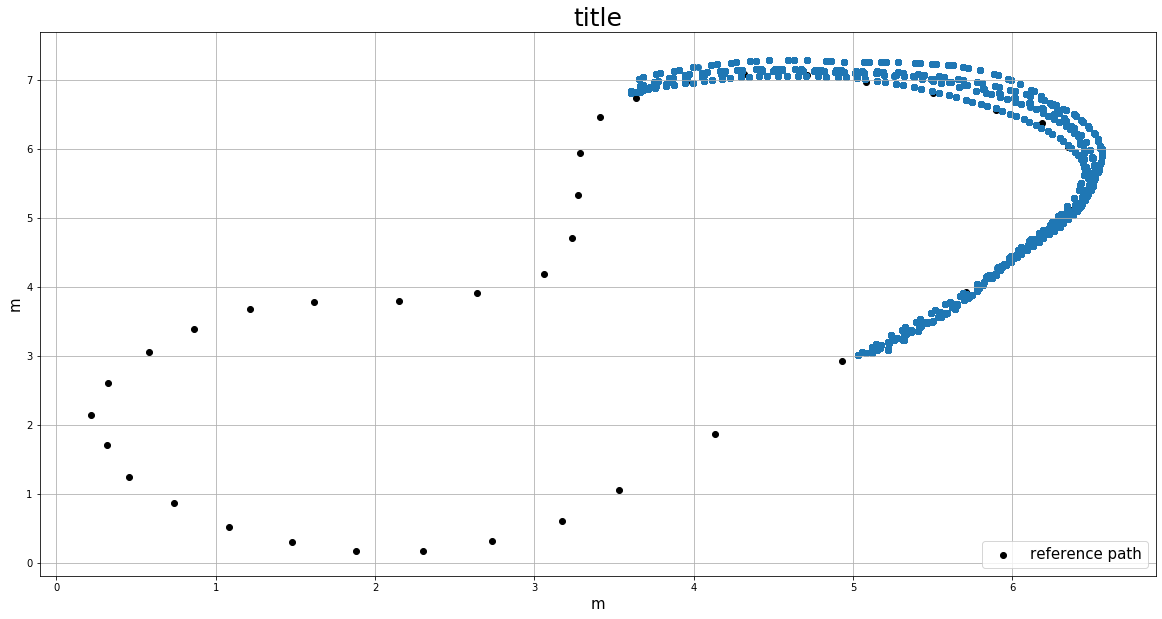

In [413]:
fig = plt.figure(figsize=(20,10))
ax = plt.gca()
plt.title('title', fontsize=25)
plt.xlabel('m', fontsize=15)
plt.ylabel('m', fontsize=15)
plt.scatter(path_x, path_y, color='black')
plt.legend(['reference path'], loc='lower right', fontsize=15)
im = plt.scatter(x_turn, y_turn)
plt.grid(True)

In [414]:

tmp = np.diff(x_turn)>1
print('nr of turns: '+repr(sum(tmp)))
turn_end_indexes = np.argwhere(tmp)
turn_end_indexes = [int(t)+1 for t in turn_end_indexes]

nr of turns: 4


In [415]:
global_end_turn_indexes = [global_idx[i] for i in turn_end_indexes]

global_end_turn_indexes

[695897, 1213133, 1699762, 2188260]

Text(0.5, 1.0, 'turn')

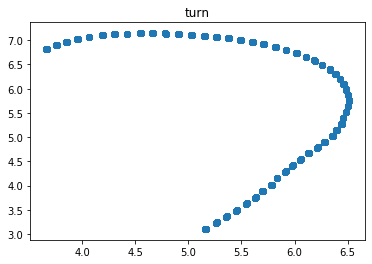

In [416]:
turns_x = np.split(x_turn, turn_end_indexes)
turns_y = np.split(y_turn, turn_end_indexes)
x_acc = np.split(x_acc, turn_end_indexes)
y_acc = np.split(y_acc, turn_end_indexes)
z_acc = np.split(z_acc, turn_end_indexes)

turn_nr = 2

plt.scatter(turns_x[turn_nr], turns_y[turn_nr])
plt.title('turn')


(0, 6.656732322502485)

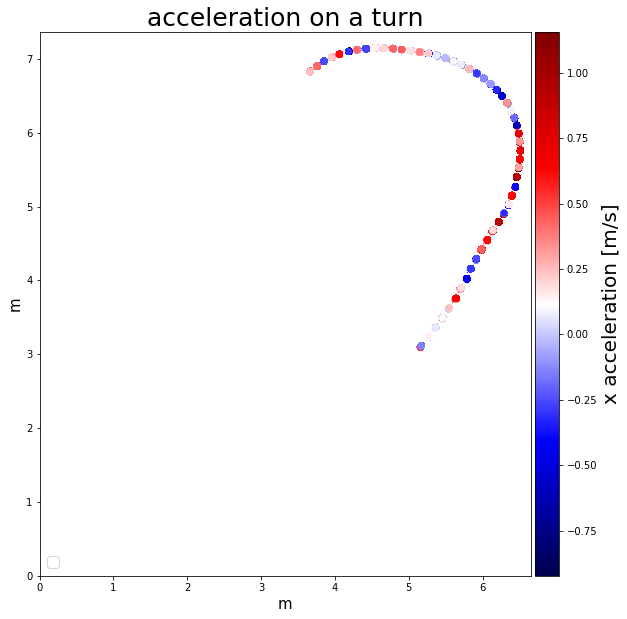

In [418]:
fig = plt.figure(figsize=(20,10))
ax = plt.gca()
plt.title('acceleration on a turn', fontsize=25)
plt.xlabel('m', fontsize=15)
plt.ylabel('m', fontsize=15)
plt.legend(['racecar path'], loc='lower left', fontsize=15)
im = plt.scatter(turns_x[turn_nr], turns_y[turn_nr], c=x_acc[turn_nr], cmap='seismic')
divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="5%", pad=0.05)

cb = plt.colorbar(im, cax=cax)
cb.set_label('x acceleration [m/s]', fontsize=20)

ax.set_aspect('equal')
ax.set_ylim(ymin=0)
ax.set_xlim(xmin=0)

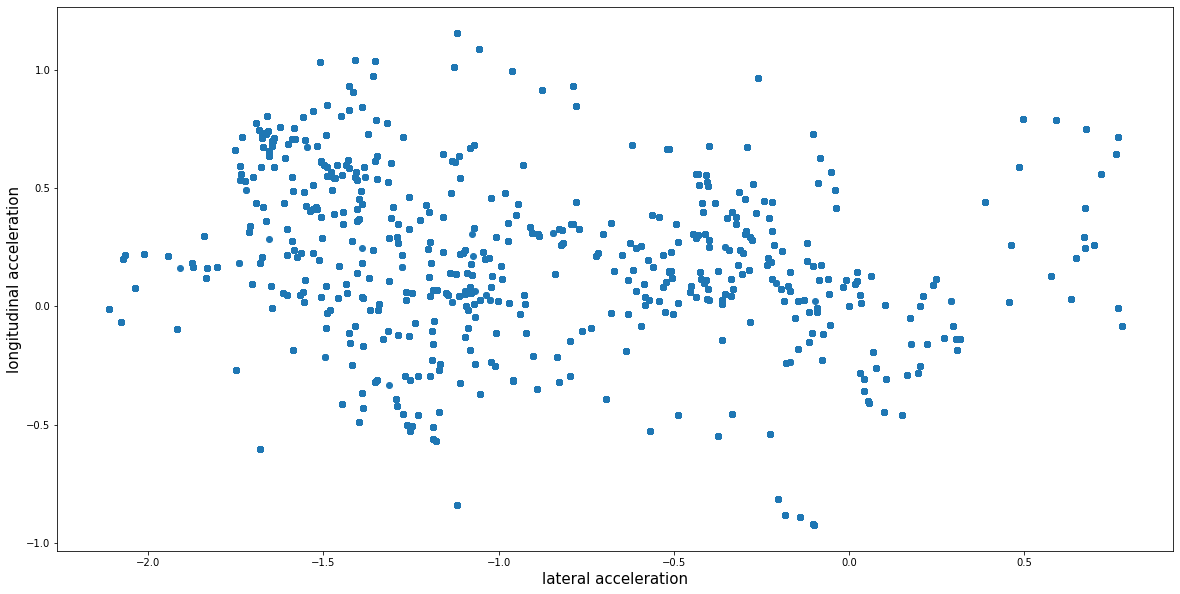

In [419]:
fig = plt.figure(figsize=(20,10))
plt.scatter(y_acc[turn_nr], x_acc[turn_nr])
plt.xlabel('lateral acceleration', fontsize=15)
plt.ylabel('longitudinal acceleration', fontsize=15)
ax.set_aspect('equal')

In [ ]:
plt.plot()

# laps separately 

In [404]:
x_laps = np.split(x_pos, global_end_turn_indexes)
y_laps = np.split(y_pos, global_end_turn_indexes)

speed_laps = np.split(speed, global_end_turn_indexes)

ax_laps = np.split(x_acc_, global_end_turn_indexes)
ay_laps = np.split(y_acc_, global_end_turn_indexes)
az_laps = np.split(z_acc_, global_end_turn_indexes)

a_res_laps = [x**2 + y**2 for x,y in zip(ax_laps, ay_laps)]

#wyrownanie do (0,0)
x_laps = [x+off_x for x in x_laps]
y_laps = [y+off_y for y in y_laps]

(0, 6.857869168304581)

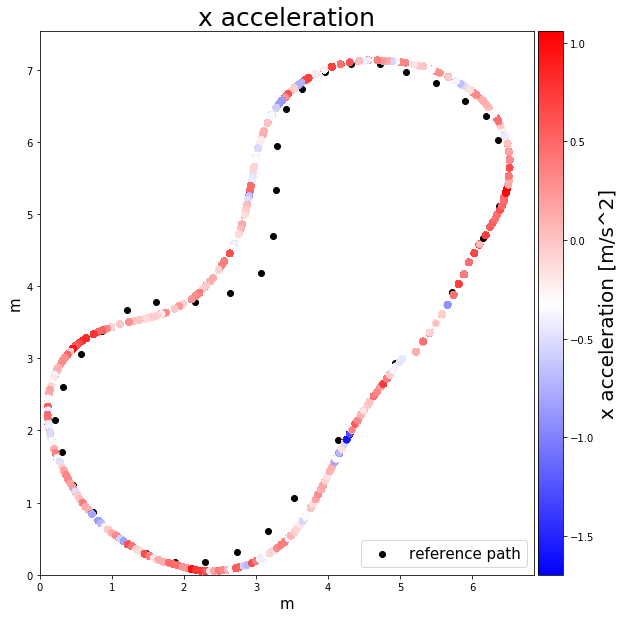

In [405]:
lap_nr = 3

fig = plt.figure(figsize=(20,10))
ax = plt.gca()
plt.title('x acceleration', fontsize=25)
plt.xlabel('m', fontsize=15)
plt.ylabel('m', fontsize=15)
plt.scatter(path_x, path_y, color='black')
plt.legend(['reference path'], loc='lower right', fontsize=15)
im = plt.scatter(x_laps[lap_nr], y_laps[lap_nr], c=ax_laps[lap_nr], cmap='bwr')
divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="5%", pad=0.05)

cb = plt.colorbar(im, cax=cax)
cb.set_label('x acceleration [m/s^2]', fontsize=20)

ax.set_aspect('equal')
ax.set_ylim(ymin=0)
ax.set_xlim(xmin=0)
#plt.savefig(image_file)

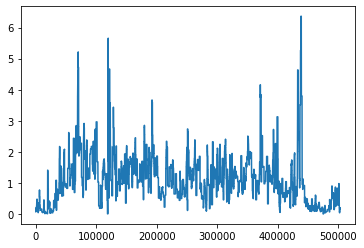

In [297]:
plt.plot(a_res_laps[lap_nr])

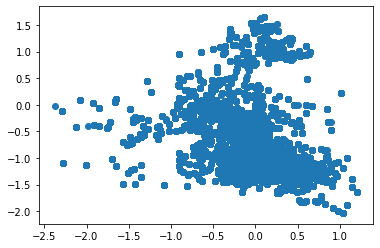

In [305]:
plt.scatter(ax_laps[lap_nr], ay_laps[lap_nr])